<a href="https://colab.research.google.com/github/ngngocsonan2610/AI-in-Finance/blob/master/pydls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LDS (dựa trên lý thuyết Markov process) là mô hình Hidden Markov process, được ứng dụng khá nhiều trong tài chính (time-series data) và nhiều lĩnh vực khác. Ở đây clinic là một ví dụ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4422790/



1.   https://github.com/mattjj/pylds
2.   List item



# pydls

In [0]:
#!pip install pylds

In [2]:
!pip install cython
!git clone https://github.com/mattjj/pylds.git
!pip install -e pylds

Cloning into 'pylds'...
remote: Enumerating objects: 1240, done.
remote: Total 1240 (delta 0), reused 0 (delta 0), pack-reused 1240
Receiving objects: 100% (1240/1240), 834.01 KiB | 11.91 MiB/s, done.
Resolving deltas: 100% (871/871), done.
Obtaining file:///content/pylds
     |████████████████████████████████| 215kB 2.7MB/s 
     |████████████████████████████████| 163kB 8.5MB/s 
  Created wheel for pybasicbayes: filename=pybasicbayes-0.2.2-cp36-cp36m-linux_x86_64.whl size=530488 sha256=e3f45374f1325766a674b688260c7c4cb820955024a30b2acbadee76bbed2ca1
  Stored in directory: /root/.cache/pip/wheels/85/60/cb/3de9793695e07ef67b57859e730d9ad81563697203c578031a
Successfully built pybasicbayes
  Running setup.py develop for pylds


In [67]:
!pip install -e pylds

Obtaining file:///content/pylds
  Found existing installation: pylds 0.0.5
    Can't uninstall 'pylds'. No files were found to uninstall.
  Running setup.py develop for pylds


In [70]:
!python pylds/setup.py --help

Common commands: (see '--help-commands' for more)

  setup.py build      will build the package underneath 'build/'
  setup.py install    will install the package

Global options:
  --verbose (-v)      run verbosely (default)
  --quiet (-q)        run quietly (turns verbosity off)
  --dry-run (-n)      don't actually do anything
  --help (-h)         show detailed help message
  --no-user-cfg       ignore pydistutils.cfg in your home directory
  --command-packages  list of packages that provide distutils commands

Information display options (just display information, ignore any commands)
  --help-commands     list all available commands
  --name              print package name
  --version (-V)      print package version
  --fullname          print <package name>-<version>
  --author            print the author's name
  --author-email      print the author's email address
  --maintainer        print the maintainer's name
  --maintainer-email  print the maintainer's email address
  --co

In [0]:
!pip install pypolyagamma>=1.1

In [4]:
!pip install scipy==1.2.1

     |████████████████████████████████| 24.8MB 177kB/s 
ERROR: umap-learn 0.4.3 has requirement scipy>=1.3.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


# example

In [0]:
import numpy.random as npr
from pylds.models import DefaultLDS

D_obs = 1       # Observed data dimension
D_latent = 2	# Latent state dimension
D_input = 0    # Exogenous input dimension
T = 2000  	    # Number of time steps to simulate

true_model = DefaultLDS(D_obs, D_latent, D_input)
inputs = npr.randn(T, D_input)
data, stateseq = true_model.generate(T, inputs=inputs)

# Compute the log likelihood of the data with the true params
true_ll = true_model.log_likelihood() 

In [0]:
# Create a separate model and add the observed data
test_model = DefaultLDS(D_obs, D_latent, D_input)
test_model.add_data(data)

# Run the Gibbs sampler
N_samples = 100
def update(model):
    model.resample_model()
    return model.log_likelihood()

lls = [update(test_model) for _ in range(N_samples)]

In [0]:
import matplotlib.pyplot as plt

import numpy as np


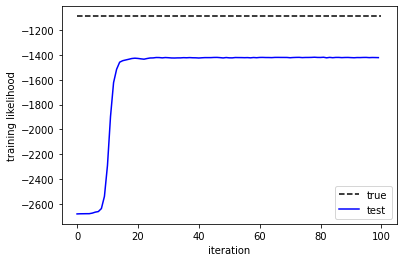

In [0]:
# Plot the log likelihoods
plt.figure()
plt.plot([0, N_samples], true_ll * np.ones(2), '--k', label="true")
plt.plot(np.arange(N_samples), lls, color='blue', label="test")
plt.xlabel("iteration")
plt.ylabel("training likelihood")
plt.legend(loc="lower right")

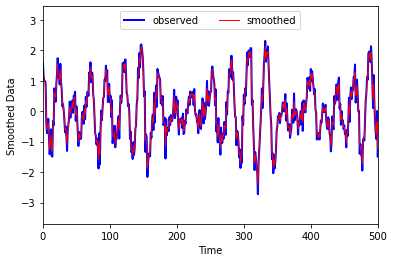

In [0]:
# Smooth the data
smoothed_data = test_model.smooth(data, inputs)

plt.figure()
plt.plot(data, color='blue', lw=2, label="observed")
plt.plot(smoothed_data, color='red', lw=1, label="smoothed")
plt.xlabel("Time")
plt.xlim(0, 500)
plt.ylabel("Smoothed Data")
plt.legend(loc="upper center", ncol=2)

In [56]:
!python 'pylds/examples/bernoulli_lds.py'

/usr/local/lib/python3.6/dist-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
.........................  [ 25/50,    0.03sec avg, ETA 0.84 ]
.........................  [ 50/50,    0.03sec avg, ETA 0.00 ]

   0.03sec avg, 1.68 total

Fitting Laplace approximation
Iteration:  0 	Objective:  -0.6462 	Avg Grad:  -0.0
Iteration:  1 	Objective:  -0.6462 	Avg Grad:  -0.0
Iteration:  2 	Objective:  -0.6462 	Avg Grad:  -0.0
Iteration:  3 	Objective:  -0.6462 	Avg Grad:  -0.0
Iteration:  4 	Objective:  -0.6462 	Avg Grad:  -0.0
Iteration:  5 	Objective:  -0.6462 	Avg Grad:  -0.0
Iteration:  6 	Objective:  -0.6462 	Avg Grad:  -0.0
Iteration:  7 	Objective:  -0.6462 	Avg Grad:  -0.0
Iteration:  8 	Objective:  -0.6462 	Avg Grad:  -0.0
Done
..........
   0.01sec avg, 0.15 total

.Fitting Laplace approximati

In [55]:
!python 'pylds/examples/poisson_lds.py'

Fitting Laplace approximation
Iteration:  0 	Objective:  -2.8613325489809926e+21 	Avg Grad:  -8.584087947589692e+17
Iteration:  1 	Objective:  -1.163331000843907e+21 	Avg Grad:  -3.490029716034931e+17
Iteration:  2 	Objective:  -4.7297508917879636e+20 	Avg Grad:  -1.418940194132897e+17
Iteration:  3 	Objective:  -1.9229732107320256e+20 	Avg Grad:  -5.7689803192087096e+16
Iteration:  4 	Objective:  -7.81822563977606e+19 	Avg Grad:  -2.3454923654308948e+16
Iteration:  5 	Objective:  -3.178653338138986e+19 	Avg Grad:  -9536060329374132.0
Iteration:  6 	Objective:  -1.2923440061204857e+19 	Avg Grad:  -3877072803379462.0
Iteration:  7 	Objective:  -5.254278628362094e+18 	Avg Grad:  -1576300170459521.0
Iteration:  8 	Objective:  -2.1362302741154762e+18 	Avg Grad:  -640875823952774.9
Iteration:  9 	Objective:  -8.685264156746935e+17 	Avg Grad:  -260560665680455.0
Iteration:  10 	Objective:  -3.5311648929658304e+17 	Avg Grad:  -105936061187486.8
Iteration:  11 	Objective:  -1.4356645090210694e

# Stock

Data:
- https://aroussi.com/post/python-yahoo-finance


In [5]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=d32824a2d0cbd0681282a280d265b76edf496dbfce8bafecdddb361bed37a48e
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import pandas as pd
import yfinance as yf


In [47]:
#define the ticker symbol
tickerSymbol = 'AMZN'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-5-01')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7599900,0,0
2010-01-05,133.43,135.48,131.81,134.69,8851900,0,0
2010-01-06,134.60,134.73,131.65,132.25,7178800,0,0
2010-01-07,132.01,132.32,128.80,130.00,11030200,0,0
2010-01-08,130.56,133.68,129.03,133.52,9830500,0,0
...,...,...,...,...,...,...,...
2020-04-24,2417.00,2420.43,2382.00,2410.22,3831800,0,0
2020-04-27,2443.20,2444.88,2363.00,2376.00,5645600,0,0
2020-04-28,2372.10,2373.50,2306.00,2314.08,5269400,0,0


In [0]:
portfolio = ['MSFT','AAPL','GOOGL','AMZN']

df_port = pd.DataFrame()


for stock in portfolio:
  #get data on this ticker
  tickerData = yf.Ticker(stock)
  #get the historical prices for this ticker
  tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-5-01')
  if df_port.shape[1] == 0:
    df_port = pd.concat([df_port,tickerDf.reset_index()[['Date']]], axis=1)

  df_port = pd.concat([df_port,tickerDf.reset_index()[['Open']].rename(columns={'Open':stock})], axis=1)

In [25]:
df_port

,Date,MSFT,AAPL,GOOGL,AMZN
0,2010-01-04,23.97,26.40,313.79,136.25
1,2010-01-05,24.15,26.54,313.90,133.43
2,2010-01-06,24.17,26.51,313.24,134.60
3,2010-01-07,23.98,26.19,305.01,132.01
4,2010-01-08,23.70,26.01,296.30,130.56
...,...,...,...,...,...
2594,2020-04-24,171.58,276.45,1255.00,2417.00
2595,2020-04-27,176.10,281.04,1292.00,2443.20
2596,2020-04-28,175.10,284.31,1283.20,2372.10
2597,2020-04-29,172.74,283.96,1345.00,2330.01


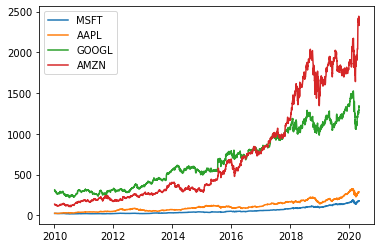

In [30]:
fig = plt.figure()

for stock in portfolio:
    plt.plot(df_port['Date'], df_port[stock], label=stock)

# plt.xlim(0,18000)
# plt.ylim(0,30)
plt.legend()
plt.show()

In [86]:
import numpy.random as npr
from pylds.models import DefaultLDS

D_obs = 1       # Observed data dimension
D_latent = 2	# Latent state dimension
D_input = 0	    # Exogenous input dimension
T = 2000  	    # Number of time steps to simulate

inputs = npr.randn(T, D_input)
data = np.transpose(np.array([df_port.AAPL]))
train = data[:2000]
test = data[2000:]
model = DefaultLDS(D_obs, D_latent, D_input)
model.add_data(train)

# true_model = DefaultLDS(D_obs, D_latent, D_input)

# data, stateseq = true_model.generate(T, inputs=inputs)

# # Compute the log likelihood of the data with the true params
# true_ll = true_model.log_likelihood() 

In [87]:
test.shape

(599, 1)

In [0]:
data, stateseq = model.generate(599, inputs=npr.randn(599, D_input))

In [0]:
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

In [98]:
print(data)

[[-0.169]
 [-0.331]
 [-0.611]
 [-0.466]
 [-0.751]
 [-1.16 ]
 [-0.73 ]
 [-0.741]
 [-0.999]
 [-0.903]
 [-0.308]
 [ 0.108]
 [ 0.42 ]
 [-0.802]
 [ 0.679]
 [ 0.258]
 [-0.437]
 [ 0.478]
 [-0.245]
 [ 1.355]
 [ 1.066]
 [ 1.816]
 [ 0.972]
 [ 1.548]
 [ 0.669]
 [ 0.997]
 [ 1.263]
 [ 0.23 ]
 [ 0.224]
 [ 0.261]
 [-0.055]
 [-1.147]
 [-0.818]
 [-1.147]
 [-0.884]
 [-0.981]
 [-0.742]
 [ 0.221]
 [ 0.013]
 [ 0.807]
 [ 0.517]
 [ 0.183]
 [-0.167]
 [-0.347]
 [-0.75 ]
 [-1.026]
 [-0.567]
 [-0.844]
 [-0.424]
 [-0.128]
 [-0.398]
 [-0.318]
 [-0.239]
 [ 0.585]
 [ 0.752]
 [ 0.732]
 [ 1.11 ]
 [ 1.295]
 [ 1.04 ]
 [ 0.896]
 [ 1.354]
 [ 1.625]
 [ 1.318]
 [ 0.423]
 [ 0.128]
 [ 0.429]
 [-0.432]
 [-0.545]
 [-0.762]
 [-0.564]
 [ 0.049]
 [-0.693]
 [-0.718]
 [-0.41 ]
 [-0.271]
 [-0.166]
 [ 1.009]
 [ 0.761]
 [ 1.398]
 [ 1.068]
 [ 1.521]
 [ 1.365]
 [ 1.404]
 [ 1.689]
 [ 1.861]
 [ 1.474]
 [ 1.496]
 [ 1.388]
 [ 0.876]
 [-0.193]
 [-0.69 ]
 [-0.838]
 [-1.117]
 [-1.645]
 [-2.081]
 [-1.682]
 [-1.065]
 [-1.237]
 [-1.452]
 [-0.985]


In [0]:
# Create a separate model and add the observed data
)

# Run the Gibbs sampler
N_samples = 100
def update(model):
    model.resample_model()
    return model.log_likelihood()

lls = [update(model) for _ in range(N_samples)]

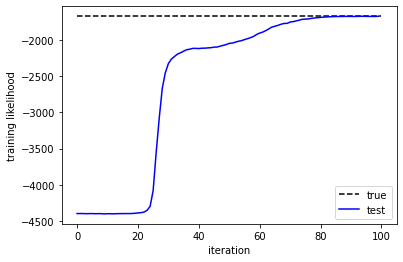

In [15]:
# Plot the log likelihoods
plt.figure()
plt.plot([0, N_samples], true_ll * np.ones(2), '--k', label="true")
plt.plot(np.arange(N_samples), lls, color='blue', label="test")
plt.xlabel("iteration")
plt.ylabel("training likelihood")
plt.legend(loc="lower right")

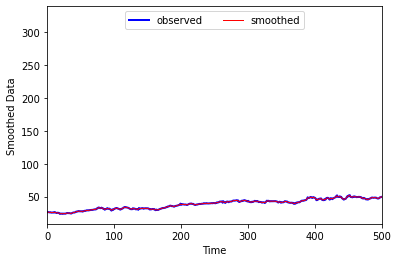

In [63]:
# Smooth the data
smoothed_data = model.smooth(data, inputs)

plt.figure()
plt.plot(data, color='blue', lw=2, label="observed")
plt.plot(smoothed_data, color='red', lw=1, label="smoothed")
plt.xlabel("Time")
plt.xlim(0, 500)
plt.ylabel("Smoothed Data")
plt.legend(loc="upper center", ncol=2)

# Crypto
- https://medium.com/@randerson112358/get-bitcoin-price-in-real-time-using-python-98b7393b6152
- https://towardsdatascience.com/cryptocurrency-analysis-with-python-buy-and-hold-c3b0bc164ffa
- https://towardsdatascience.com/cryptocurrency-analysis-with-python-macd-452ceb251d7c

In [113]:
import requests
from datetime import datetime
def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)

def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,'datetime_interval should be one of %s' % supported_intervals   

    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)  

    params = {'fsym': from_symbol, 'tsym': to_symbol,'limit': 2000, 'aggregate': 1,'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data

def convert_to_dataframe(data):
    df = pd.io.json.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df
def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df




Filtering 0 empty datapoints
Saving data to BTC_USD_Bitstamp_day_2020-06-01.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [115]:
from_symbol = 'BTC'
to_symbol = 'USD'
exchange = 'Bitstamp'
datetime_interval = 'day'

data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
df = convert_to_dataframe(data)
df = filter_empty_datapoints(df)


current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
df.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to BTC_USD_Bitstamp_day_2020-06-01.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [116]:
df

,datetime,low,high,open,close,volumefrom,volumeto
0,2014-12-10,347.23,353.74,350.49,348.13,6579.79,2.304336e+06
1,2014-12-11,339.80,364.43,348.13,348.98,16533.38,5.842055e+06
2,2014-12-12,348.00,358.59,348.98,354.48,8039.95,2.846452e+06
3,2014-12-13,347.03,354.95,354.48,351.45,3880.75,1.359211e+06
4,2014-12-14,348.96,351.98,351.45,350.17,561.33,1.968316e+05
...,...,...,...,...,...,...,...
1996,2020-05-28,9105.79,9625.01,9210.00,9577.38,11523.41,1.081915e+08
1997,2020-05-29,9330.00,9610.00,9577.38,9421.04,7226.77,6.832154e+07
1998,2020-05-30,9326.28,9758.27,9421.04,9705.10,3731.12,3.574153e+07
1999,2020-05-31,9373.96,9711.70,9705.10,9446.19,1397.25,1.327501e+07
